In [1]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [6]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
#type(train)
train = train.iloc[0:1000]

In [7]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [8]:
train.isnull().any()
#we need to deal with null value

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [9]:
test.isnull().any()

id              False
comment_text    False
dtype: bool

there's no null value for us to worry about

I think the prepossesing part is where we can do better

In [10]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

to use keras now to tokenize the sentence, where we can do it by ourselves

In [11]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [12]:
list_sentences_train[:1]

0    Explanation\nWhy the edits made under my usern...
Name: comment_text, dtype: object

In [13]:
list_tokenized_train[:1]

[[682,
  70,
  1,
  123,
  104,
  155,
  28,
  405,
  4522,
  4523,
  1066,
  79,
  219,
  44,
  2819,
  4524,
  48,
  4525,
  15,
  65,
  4526,
  124,
  6,
  2108,
  29,
  113,
  874,
  4527,
  4528,
  5,
  49,
  59,
  204,
  1,
  358,
  32,
  1,
  37,
  31,
  132,
  68,
  4529,
  94,
  2820,
  2821,
  1400,
  953]]

In [14]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

if we want to use the twitter, the length will not be the problem since the max twitter would be 140, but we could still analyze it so it may be even shorter

In [15]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

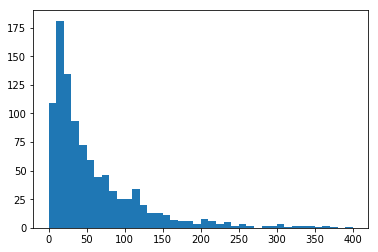

In [16]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.show()

In [17]:
inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

In [18]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [19]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [20]:
x = GlobalMaxPool1D()(x)

In [21]:
x = Dropout(0.1)(x)

In [22]:
x = Dense(50, activation="relu")(x)

In [23]:
x = Dropout(0.1)(x)

In [24]:
x = Dense(6, activation="sigmoid")(x)

In [25]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [26]:
batch_size = 32
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/2
900/900 [==============================] - 19s 21ms/step - loss: 0.4628 - acc: 0.9241 - val_loss: 0.1675 - val_acc: 0.9683
Epoch 2/2
900/900 [==============================] - 21s 23ms/step - loss: 0.1700 - acc: 0.9609 - val_loss: 0.1242 - val_acc: 0.9683
